In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv2
from ultralytics import YOLO
import pandas as pd
import imutils

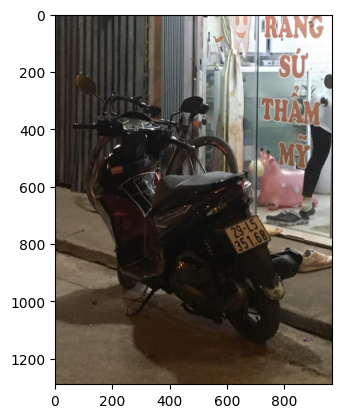

In [6]:
image = Image.open('./Motobike5.jpg')
image = np.array(image)
plt.imshow(image[200:1100,100:800])
plt.show()

In [7]:
# save the image
plt.imsave('saved_image.jpg', image[200:1100,100:800])

In [24]:
def get_plate(plate):
    plate_gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    filtered = cv2.bilateralFilter(plate_gray, 5, 250, 250)

    edged = cv2.Canny(filtered, 30, 200) 
    contours = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)    

    cnts = imutils.grab_contours(contours)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[:10]

    screen = None

    for c in cnts:
        epsilon = 0.018*cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, epsilon, True)
        if len(approx) == 4:
            screen = approx
            break

    mask = np.zeros(plate_gray.shape, np.uint8)

    # new_img = cv2.drawContours(mask, [screen], 0, (255, 255, 255), -1)
    # new_img = cv2.bitwise_and(plate, plate, mask= mask)

    (x,y) = np.where(mask == 255)

    # (topx, topy) = (np.min(x),np.min(y))
    # (bottomx, bottomy) = (np.max(x),np.max(y))

    # croped = plate_gray[topx:bottomx + 1, topy:bottomy + 1]

    return screen


0: 640x480 1 class_0, 16.0ms
Speed: 5.0ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
[[[82 13]]

 [[16 22]]

 [[ 8 91]]

 [[75 82]]]


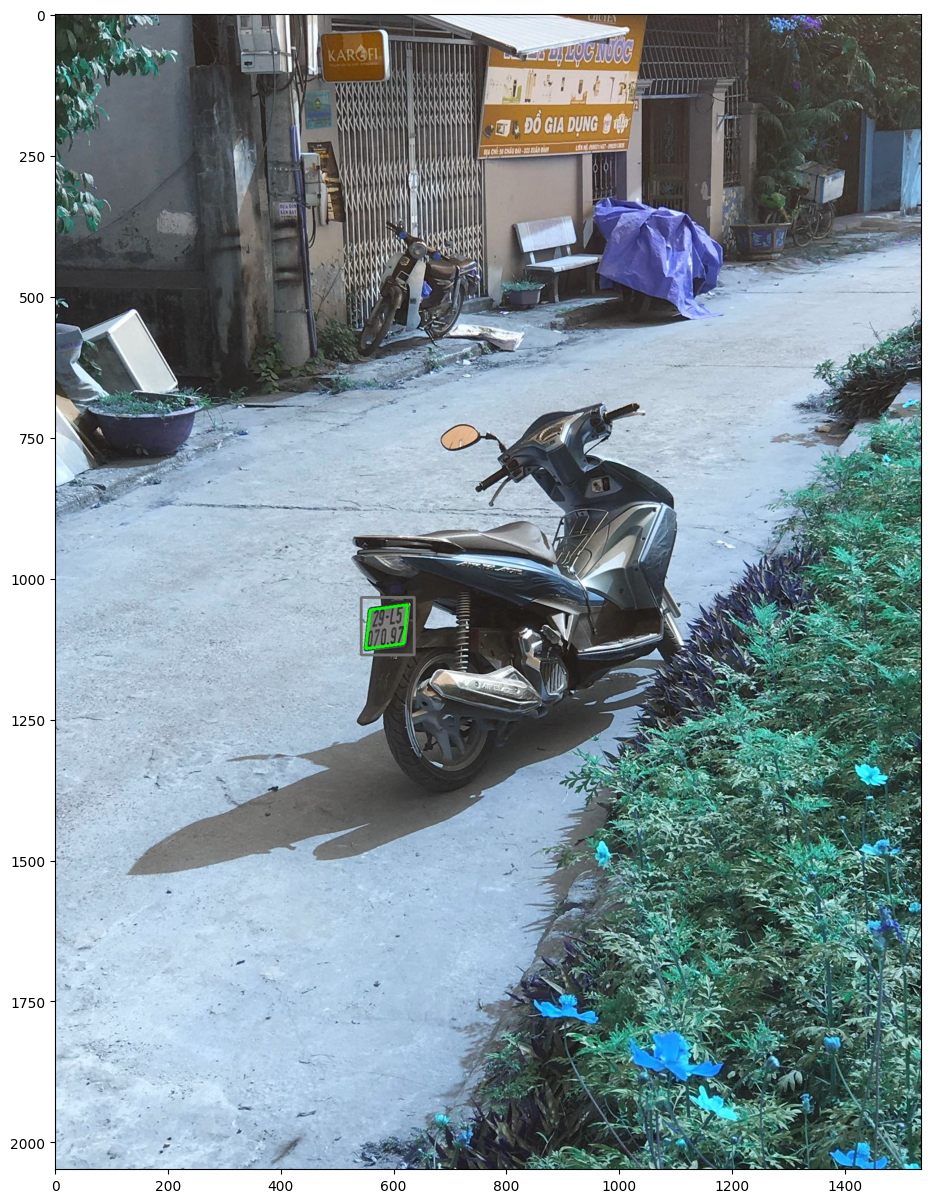

In [26]:
image = cv2.imread('./images/Motobike18.jpg')
# resize image to fit the model yolo v8

model = YOLO("./model/vn-kaggle/best.pt")
detections = model.predict(image)
a = detections[0].boxes.data
px = pd.DataFrame(a.cpu().numpy())
detections_ = []
for index, detection in px.iterrows():
    x1 = int(detection[0])
    y1 = int(detection[1])
    x2 = int(detection[2])
    y2 = int(detection[3])
    confidence = float(detection[4])
    class_id = int(detection[5])
    detections_.append([x1, y1, x2, y2])

if len(detections_) == 0:
    print("No plate detected")

for detection in detections_:
    (x1, y1, x2, y2) = detection

    cv2.rectangle(image, (x1, y1), (x2, y2), (111, 111, 111), 3)

    roi = image[int(y1):int(y2), int(x1):int(x2)]

    plate = get_plate(roi)
    print(plate)
    if plate is not None:
        cv2.drawContours(roi, [plate], -1, (0, 255, 0), 3)
    else: 
        print("No edge detected")

plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()